<a href="https://colab.research.google.com/github/Dami442/mlproject/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

ImportError: cannot import name 'SGDOneClassSVM' from 'sklearn.svm' (/usr/local/lib/python3.11/dist-packages/sklearn/svm/__init__.py)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# EDA
# checking if there are any missing values
df.isnull().values.any()

False

In [ ]:
# Check the no of values in the class column
count_classes = pd.value_counts(df['Class'], sort = True)

<ipython-input-5-eadba891f128>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


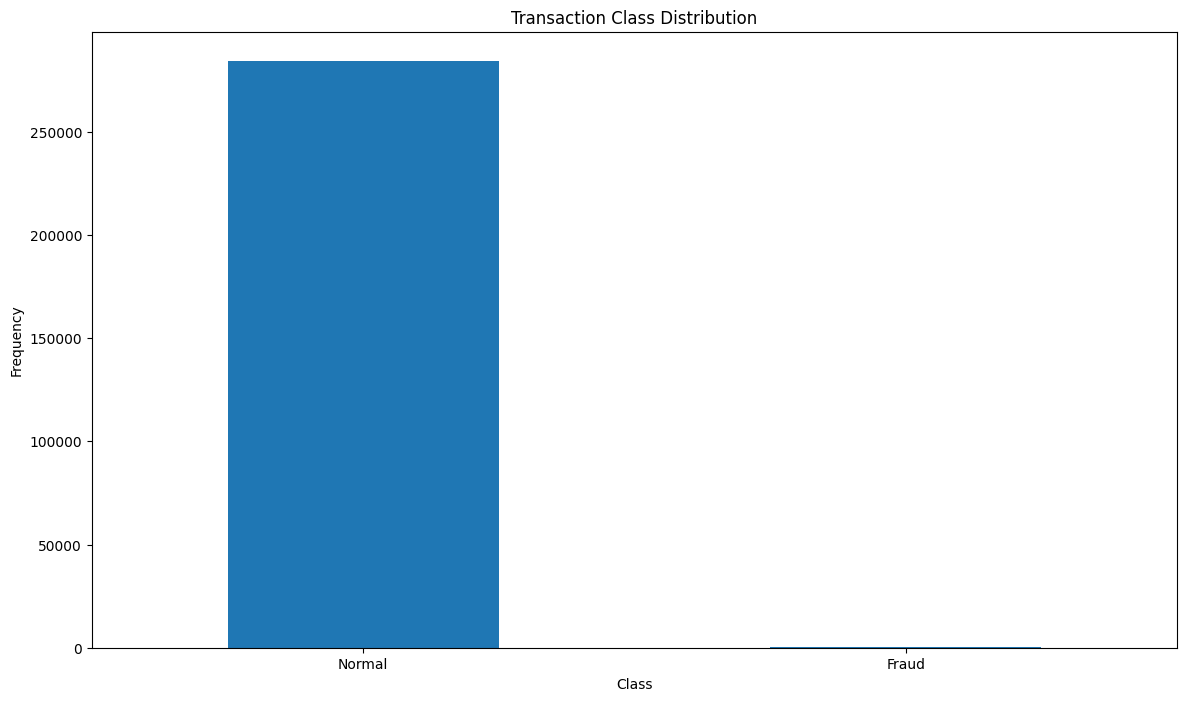

In [ ]:
# Plotting to visualize the categories 0 and 1
count_classes.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

Comments:
This data has a large no of normal transactions.

There a only a few indicated fraudulent actions

In [ ]:
# Getting the fraud and normal dataset

Fraud = df[df['Class'] == 1]

Normal = df[df['Class'] == 0]


In [ ]:
print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Analysing to get more amount of info from transaction data
# by checking the statistics of the amount of money transacted in each class

Fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
Normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


Exploratory Data Analysis

In [ ]:
# check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Comments:
No missing values in the data

<function matplotlib.pyplot.show(close=None, block=None)>

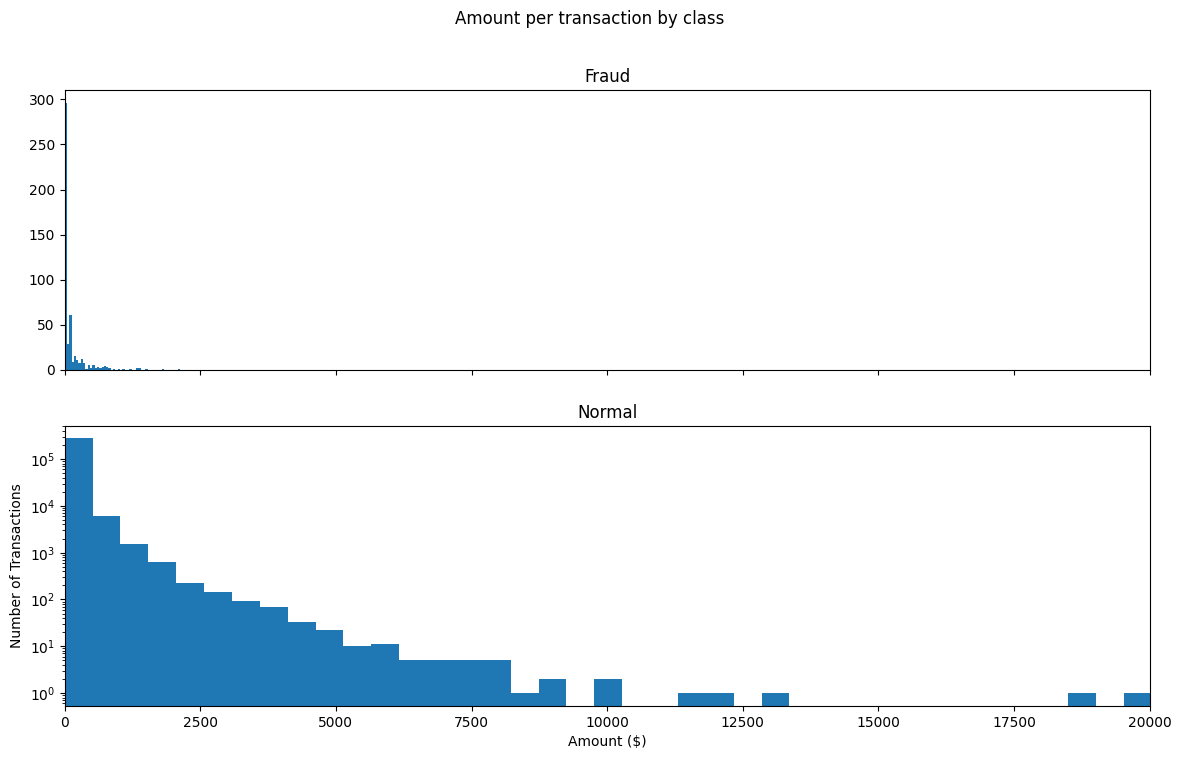

In [ ]:
# making plots to visualize amount per transaction by each class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.set_title('Fraud')
ax1.hist(Fraud.Amount, bins=bins)

ax2.set_title('Normal')
ax2.hist(Normal.Amount, bins=bins)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale(('log'))
plt.show


Comments:

For the Fraud Class; Just a few transactions were made with relatively small amounts(less than $2500).
The highest no of transactions was a bit above 50

Normal Class: The highest amount was around 20000, with amounts around $2500 having the largest frequency


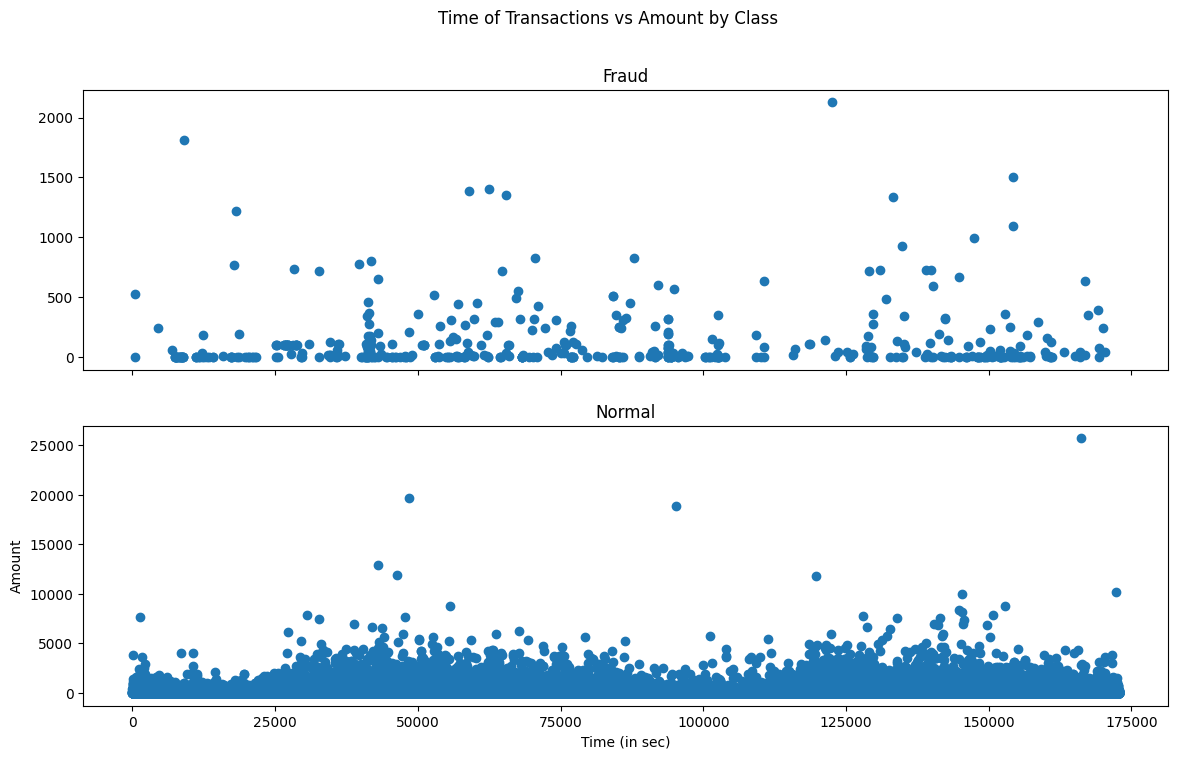

In [ ]:
# Checking to see if fraudulent transactions occur more often during a certain timeframe

f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of Transactions vs Amount by Class")

ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in sec)')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Take sample of data

df1 = df.sample(frac=0.1, random_state=1)

df1.shape

(28481, 31)

In [ ]:
df.shape

(284807, 31)

In [ ]:
# Determine no of fraud and valid transactions in dataset

Fraud = df1[df1['Class'] == 1]
Valid = df1[df1['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases: {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases: 28432


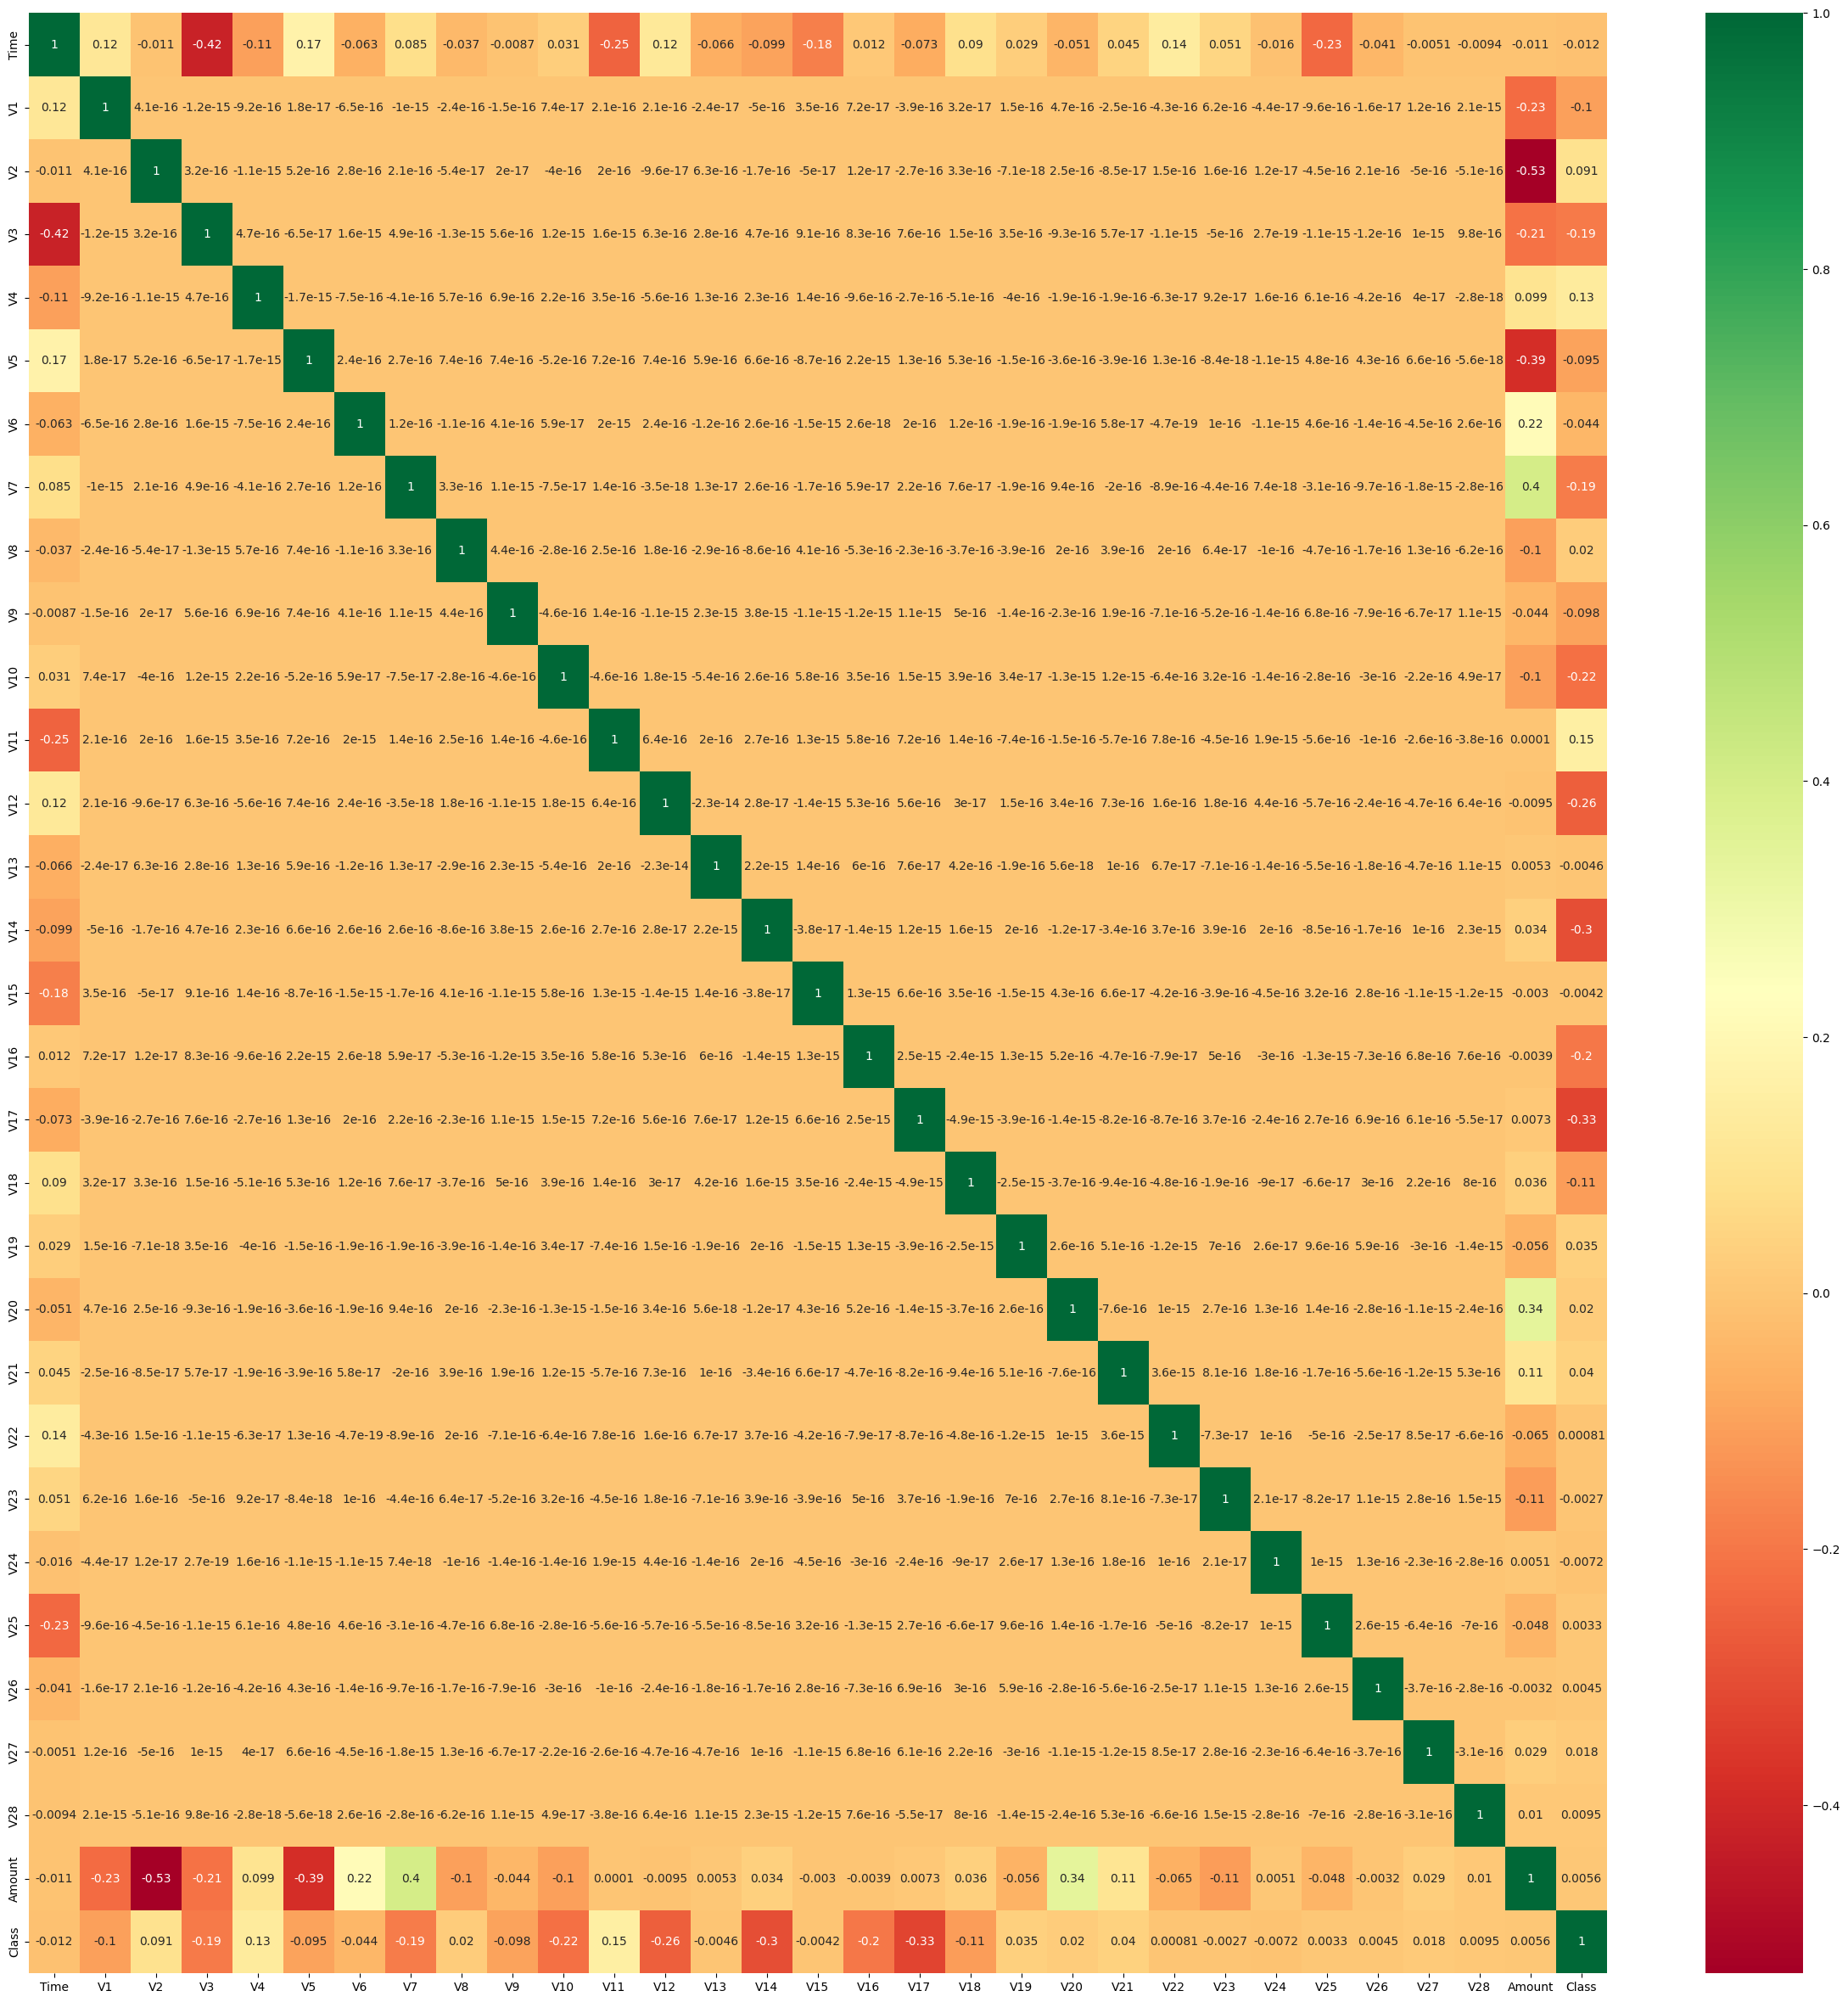

In [ ]:
# Correlation
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
h = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [ ]:
# Create independent and dependent features

columns = df1.columns.tolist()

# filter columns to remove data not needed
columns = [i for i in columns if i not in ['Class']]

target = 'Class'
# Define random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]

X.outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


<ipython-input-9-d6fa68f0e3c4>:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))


In [ ]:
X_sample, Y_sample = X[:50000], Y[:50000]  # Use only 50,000 rows because of low computational power
X_sample.shape

(50000, 30)

Model Prediction

In [ ]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_sample),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',
                                                leaf_size=30, metric='minkowski',
                                                p=2,metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel="rbf", gamma="auto")

}

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
  # Fit data and tag outliers
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X_sample)
    scores_prediction = clf.negative_outlier_factor_
  elif clf_name == "Support Vector Machine":
    clf.fit(X_sample)
    y_pred = clf.predict(X_sample)
  else:
    clf.fit(X_sample)
    y_pred = clf.predict(X_sample)
    scores_prediction = clf.decision_function(X_sample)

  # Reshape pred values to 0 for valid/normal transactions, 1 for fraud transactions
  y_pred[y_pred == 1] = 0 # for normal
  y_pred[y_pred == -1] = 1 # for anomaly
  n_errors = (y_pred != Y_sample).sum()

  # Classification Report Using Metrics
  print("{}: {}".format(clf_name,n_errors))
  print("Accuracy Score: ")
  print(accuracy_score(Y_sample, y_pred))
  print("Classification Report: ")
  print(classification_report(Y_sample, y_pred))



Isolation Forest: 133
Accuracy Score: 
0.99734
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49852
           1       0.59      0.34      0.43       148

    accuracy                           1.00     50000
   macro avg       0.79      0.67      0.72     50000
weighted avg       1.00      1.00      1.00     50000

Local Outlier Factor: 213
Accuracy Score: 
0.99574
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49852
           1       0.13      0.07      0.09       148

    accuracy                           1.00     50000
   macro avg       0.56      0.54      0.55     50000
weighted avg       0.99      1.00      1.00     50000

Support Vector Machine: 20097
Accuracy Score: 
0.59806
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     49852
           1

Observations